In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

df_weather = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv')
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,1029,85.750,11,10,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,1029,95.125,12,9,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,1032,77.000,12,10,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,1038,12.375,9,6,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,1038,18.625,9,5,3,116,116,116,0,1,8.7,very bad,1,5


Load the dataset and conduct an exploratory analysis: the number of features, correlations in the data, statistical indicators (of position, dispersion)...

In [ ]:
df_weather.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY'],
      dtype='object')

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [ ]:
df_weather.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,50.017760,17.311475,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,28.935057,6.688467,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,0.000000,5.000000,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,24.750000,12.000000,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,53.937500,16.000000,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,74.000000,23.000000,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,100.000000,38.000000,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


In [ ]:
corr = df_weather.corr().iloc[1:,1:]

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z = corr,
    x = corr.columns.values,
    y = corr.columns.values,
    colorscale = px.colors.diverging.RdBu,
    zmid=0
))

fig.update_layout(width=1000, height=900)
fig.show()

Create a slice of the dataset with only the numeric columns (you can use the method .select_dtypes(include='number') to help you). You will name this slice: X. This slice X must have 366 rows and 22 columns. Create a second slice with only the column OPINION. You will name this slice y.

In [ ]:
X = df_weather.select_dtypes(include='number')
y = df_weather["OPINION"]
print (X.shape)
print (y.shape)

(366, 22)
(366,)


Use a scaler to scale your data. You will transform your data with this scaler, and save the scaled data in X, which must also have 366 rows and 22 columns.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(366, 22)

Instantiate a pca object, and train it on your standardized data.

In [ ]:
pca = PCA(n_components=0.7)
X_pca = pca.fit_transform(X_scaled)

How many principal components explain at least 70% of the variance? You can use the attribute pca.explained_variance_ratio_. How about 80%?

In [ ]:
print (f"We need {len(pca.explained_variance_ratio_)} principal components to explain at least 70% of the variance")
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled )
print (f"We need {len(pca.explained_variance_ratio_)} principal components to explain at least 80% of the variance")

We need 4 principal components to explain at least 70% of the variance
We need 6 principal components to explain at least 80% of the variance


Transform your data with pca.fit_transform(X_scaled), and store the result in X_pca. Display on a scatterplot the first 2 columns (those that explain the most variance). Put a different color for each OPINION. You should get a graph like this: 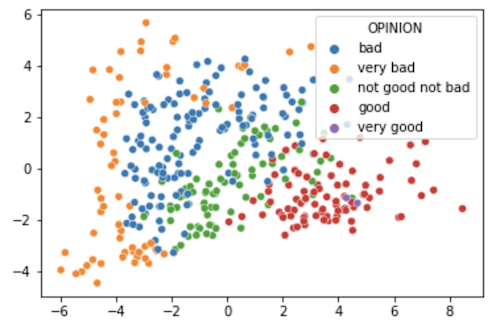

In [ ]:
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[-2.97987147,  2.61453732,  2.8859532 , -1.09325648,  0.44689298,
         0.42202727],
       [-2.6958366 , -0.06353191,  2.26426249, -1.26933872,  0.06147216,
         1.70421241],
       [-2.31402513,  0.03346593,  2.00696481, -1.44871   ,  0.07386962,
         1.75254075],
       ...,
       [-4.15427537,  0.09552199, -1.31593286,  2.64007758, -0.74172798,
        -2.21211158],
       [-4.43849341, -1.48453855, -0.8812206 ,  2.37776356, -1.42855298,
        -0.8373469 ],
       [-4.68480637,  1.48249327, -1.43168694,  2.29644065, -1.13337073,
        -0.95042739]])

In [ ]:
X_pca2 = pd.DataFrame(X_pca)

In [ ]:
X_pca2["OPINION"] = df_weather["OPINION"]

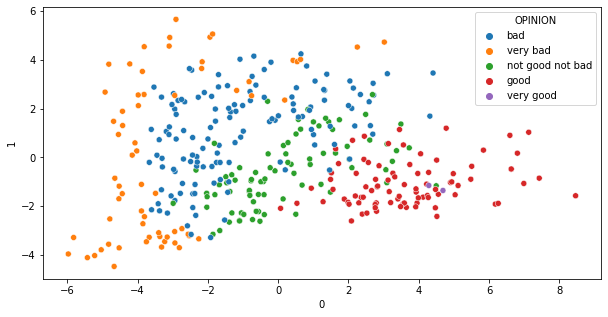

In [ ]:
fig = plt.figure(figsize =(10, 5))

sns.scatterplot(data = X_pca2,
                x = X_pca2[0], 
                y = X_pca2[1]
               ,hue="OPINION"
                )
plt.show()

Run a KNN classification on X_scaled and y. What is your score? Run another KNN classification on the first two columns of X_pca and y. Is the score very different?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X_scaled, y)
print("accuracy score on X_scaled:",model.score(X_scaled, y))

accuracy score on X_scaled: 0.8661202185792349


In [ ]:
model = KNeighborsClassifier().fit(X_pca, y)
print("accuracy score on X_pca:",model.score(X_pca, y))

accuracy score on X_pca: 0.8360655737704918


In [ ]:
# The score isn't very different